# TD sinusoïde -- modélisation par une oscillation pure

### ***Chargement des données***

In [14]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
sinusoide = np.load("sinusoide.npz")
print(sinusoide.files)

['t', 's']


In [16]:
t = sinusoide[sinusoide.files[0]]
s = sinusoide[sinusoide.files[1]]

In [17]:
print("La dimension de la donnée t est ",t.shape)
print("La dimension de la donnée s est ",s.shape)

La dimension de la donnée t est  (401,)
La dimension de la donnée s est  (401,)


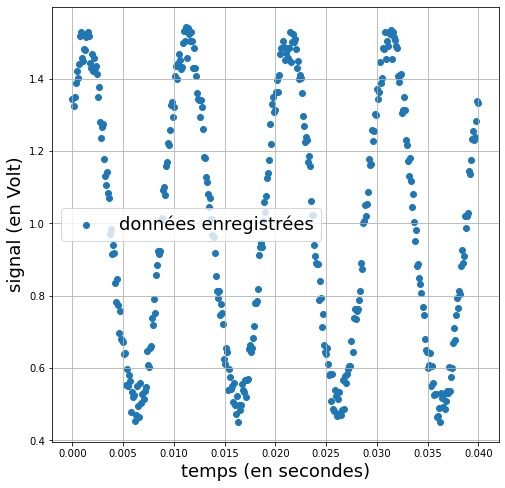

In [18]:
plt.figure(figsize=(8,8))
plt.scatter(t, s, label="données enregistrées")
plt.xlabel('temps (en secondes)', fontsize=18)
plt.ylabel('signal (en Volt)', fontsize=18)
plt.legend(fontsize=18)
plt.grid()
plt.show()


***


###  ***Modélisation envisagée***  
La visualisation graphique montre :  
* un signal période de période ***10 ms***, donc de fréquence $F_0=100$ Hz
* un signal qui semble être une oscillation pure

Le modèle recherché est donc :
$$\hat{s} = a_0+A\,\sin(2\,\pi\,F_0\,t+\varphi) = a_0 + A\,\cos(\varphi)\,\sin(2\,\pi\,F_0\,t) + A\,\sin(\varphi)\,\cos(2\,\pi\,F_0\,t)$$
$$\hat{s} = a + b\,\sin(2\,\pi\,F_0\,t) + c\,\cos(2\,\pi\,F_0\,t)$$

In [27]:
n, F0 = len(s), 100
M, V = np.stack((np.ones(n), np.sin(2*np.pi*F0*t), np.cos(2*np.pi*F0*t)), axis=1), s
X, Residu, _ ,_  = list(np.linalg.lstsq(M, V,rcond=None))
hats = M @ X

#### Visualisation graphique

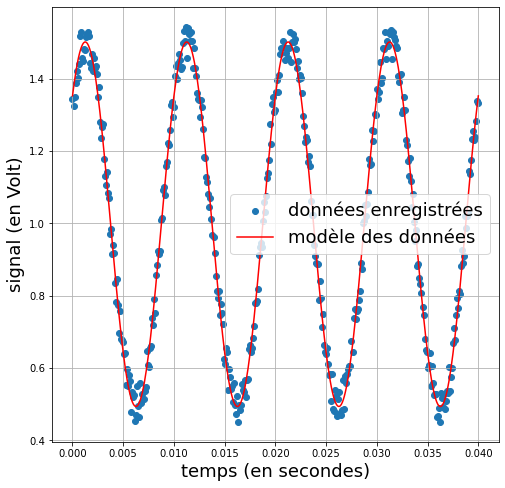

In [28]:
plt.figure(figsize=(8,8))
plt.scatter(t, s, label="données enregistrées")
plt.plot(t, hats, c='r', label="modèle des données")
plt.xlabel('temps (en secondes)', fontsize=18)
plt.ylabel('signal (en Volt)', fontsize=18)
plt.legend(fontsize=18)
plt.grid()
plt.show()